# **Model analysis**
This notebook aims to analyze and present the significant results from the tested models. Our main focus will be on visualizations and error metrics. Additionally, we will evaluate the performance of our models using unseen data from the current year (January to May).

SARIMAX demonstrated superior performance among the models tested compared to the baseline models. Therefore, we will primarily emphasize the SARIMAX model, which significantly outperformed the others.

### **Table of contents**

1. Import libraries and data load
2. MAPE and MAE Results 
    - Next steps 
3. SARIMAX Results 
4. Model Validation 
    - SARIMAX Reconstruction
5. Results Plots

### **1. Import libraries and data load**

In [384]:
#Import all relevant libraries
import pandas as pd
import numpy as np

import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.dates as mdates
from scipy import stats
from statsmodels.api import tsa
import statsmodels.api as sm

In [385]:
import warnings
warnings.filterwarnings("ignore")

In [386]:
df = pd.read_csv('../data/historic_demand_2009_2023_modeling.csv', index_col=0)
df_monthly = pd.read_csv('../data/monthly_historic_demand_2009_2023_results.csv', index_col=0)
results = pd.read_csv('../data/results.csv', index_col=0)

df = df.set_index(pd.to_datetime(df.index))
df_monthly = df_monthly.set_index(pd.to_datetime(df_monthly.index))

print(f"Index data type of df is: {type(df.index)}")
print(f"Index data type of df_monthly is: {type(df_monthly.index)}")

Index data type of df is: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Index data type of df_monthly is: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [387]:
#Check results table
results

,model,Train_MAPE,Test_MAPE,Train_MAE,Test_MAE
0,Simple_Mean,3.957661,5.488195,1.867551e+06,2.126467e+06
1,Rolling_AVG,5.310872,5.135859,2.520438e+06,2.122838e+06
2,"ARIMA(4,0,2)",12.243213,5.152527,6.198869e+06,1.990700e+06
3,"SARIMA(3,1,2)x(0,1,3,12)",4.567475,7.047027,2.184182e+06,2.740520e+06
4,"SARIMAX(3,1,2)x(0,1,3,12)",3.431899,3.730760,1.608049e+06,1.417350e+06


In [388]:
#Print result table to include in markdown
markdown_table = results.to_markdown()

markdown_cell = f"""
## Table
{markdown_table}
"""
print(markdown_cell)


## Table
|    | model                     |   Train_MAPE |   Test_MAPE |   Train_MAE |    Test_MAE |
|---:|:--------------------------|-------------:|------------:|------------:|------------:|
|  0 | Simple_Mean               |      3.95766 |     5.4882  | 1.86755e+06 | 2.12647e+06 |
|  1 | Rolling_AVG               |      5.31087 |     5.13586 | 2.52044e+06 | 2.12284e+06 |
|  2 | ARIMA(4,0,2)              |     12.2432  |     5.15253 | 6.19887e+06 | 1.9907e+06  |
|  3 | SARIMA(3,1,2)x(0,1,3,12)  |      4.56748 |     7.04703 | 2.18418e+06 | 2.74052e+06 |
|  4 | SARIMAX(3,1,2)x(0,1,3,12) |      3.4319  |     3.73076 | 1.60805e+06 | 1.41735e+06 |



In [389]:
#Load models 
arima_model_fit = joblib.load('../model/monthly_arima.pkl')
sarima_model_fit = joblib.load('../model/monthly_sarima.pkl')
sarimax_model_fit = joblib.load('../model/monthly_sarimax.pkl')

In [390]:
#Error metrics functions  
def mean_absolute_percentage_error(true_values, predicted_values):
    error = true_values - predicted_values
    absolute_percentage_error = np.abs(error/true_values)
    mape = absolute_percentage_error.mean() * 100
    
    return mape

def mean_absolute_error(true_values, predicted_values):
    error = np.abs(true_values - predicted_values)
    mae = error.mean()

    return mae

### **2. MAPE and MAE Results**

The table below presents the results of the modeling process, which yielded relatively modest outcomes. Among the models tested, only SARIMAX demonstrated a significant improvement over the baseline models. While a monthly prediction error of 3.73% may appear acceptable, considering that our "dumb" model achieved a 5.13% error, there is room for further improvement in the model's performance.

| Model                     |   Train_MAPE |   Test_MAPE |   Train_MAE |   Test_MAE |
|:--------------------------|-------------:|------------:|------------:|-----------:|
| Simple_Mean (baseline)    |     3.95%    |    5.48%    | 1,867,551   | 2,126,466  |
| Rolling_AVG (baseline)    |     5.31%    |    5.13%    | 2,520,044   | 2,122,838  |
| ARIMA(4,0,2)              |     12.24%   |    5.15%    | 6,198,868   | 1,990,700  |
| SARIMA(3,1,2)x(0,1,3,12)  |     4.56%    |    7.04%    | 2,184,182   | 2,740,519  |
| SARIMAX(3,1,2)x(0,1,3,12) |     3.43%    |    3.73%    | 1,608,039   | 1,417,534  |

#### **Next steps**

To enhance the performance of our model, we will pursue the following strategies:
1.	Refine the SARIMA model, which is expected to perform better than the ARIMA model due to its ability to capture the seasonal behavior of energy consumption. By optimizing the SARIMA parameters and fine-tuning the model, we aim to improve its predictive accuracy.
2.	Expand the exogenous variables incorporated in the SARIMAX model. By including additional relevant factors, such as weather data or economic indicators, we can enhance the model's ability to capture the influences on energy consumption and potentially improve its forecasting performance.
3.	Explore the application of machine learning algorithms. In addition to statistical models, we will test and compare the performance of machine learning approaches to time series forecasting. By leveraging the capabilities of machine learning algorithms, we can assess whether they offer any advantages over the statistical models in terms of accuracy and predictive power.

  

### **3. SARIMAX Resulst**

Having that the SARIMAX was our best perfoming model we can check its diagnostics to check its performance. 

In [391]:
sarimax_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                         nd   No. Observations:                  134
Model:             SARIMAX(3, 1, 2)x(0, 1, [1, 2, 3], 12)   Log Likelihood               -1923.246
Date:                                    Sun, 25 Jun 2023   AIC                           3868.492
Time:                                            13:49:37   BIC                           3899.246
Sample:                                        01-01-2009   HQIC                          3880.983
                                             - 02-01-2020                                         
Covariance Type:                                      opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
temp          -7.227e+05    4.5e-08  -1.61e+13      0.000   -7.23e+05   -7.23e+05
import_export    -0.2812      0.181     -1.550      0.121      -0.637       0.074
ar.L1            -1.5715      0.032    -49.551      0.000      -1.634      -1.509
ar.L2            -1.0557      0.040    -26.545      0.000      -1.134      -0.978
ar.L3            -0.0862      0.028     -3.124      0.002      -0.140      -0.032
ma.L1             1.5312      0.020     78.038      0.000       1.493       1.570
ma.L2             0.9678      0.017     55.922      0.000       0.934       1.002
ma.S.L12         -0.1595      0.051     -3.104      0.002      -0.260      -0.059
ma.S.L24         -0.1773      0.036     -4.878      0.000      -0.249      -0.106
ma.S.L36         -0.0631      0.018     -3.517      0.000      -0.098      -0.028
sigma2         3.226e+12   3.69e-14   8.74e+25      0.000    3.23e+12    3.23e+12
===================================================================================
Ljung-Box (L1) (Q):                   6.73   Jarque-Bera (JB):                27.87
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.38e+41. Standard errors may be unstable.
"""

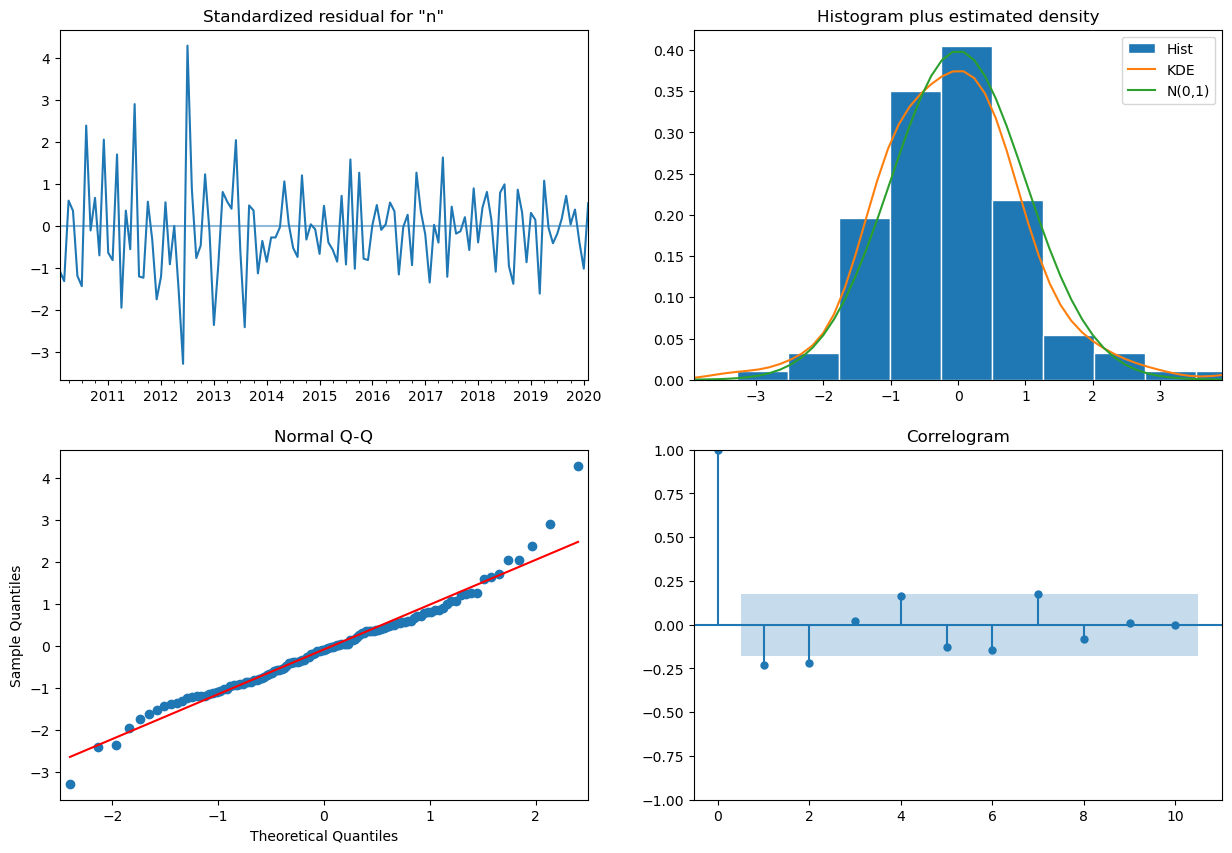

In [392]:
sarimax_model_fit.plot_diagnostics(figsize=(15,10))
plt.show()

From the plots above, we can draw the following conclusions regarding our SARIMAX model (3, 1, 2)x(0, 1, 3, 12):

1. The standardized residuals do not exhibit any discernible pattern, seasonality, or trend, which is a positive indication. This suggests that the model has adequately captured the underlying patterns in the data.

2. The kernel density estimation (KDE) curve in the histogram of the residuals appears to resemble a normal distribution. This indicates that the residuals follow a roughly Gaussian distribution, supporting the assumption of normality in our model.

3. The Normal Q-Q plot reveals that most of the residuals align closely with the theoretical quantiles of a normal distribution. However, it is worth noting that at the right end of the x-axis, the residuals deviate from the line. This suggests that the residuals may exhibit some departure from a strictly normal distribution in the tail regions.

4. The correlogram (ACF function) illustrates that there might still be some residual autocorrelation present. This indicates that there is room for improvement in the model, as residual autocorrelation suggests that additional patterns or dependencies in the data are not adequately captured.

Overall, while the SARIMAX model shows promising results with regard to residual patterns and normality assumptions, there is still potential for refinement to further enhance its performance and address any remaining residual autocorrelation.


Another usefull way to analyze results is to check the p values, which from the list below we can see that all the p-values haver low values except for the `import_export` column. This issue needs to be addressed in subsequents runs of the model. 

In [393]:
sarimax_model_fit.pvalues

temp              0.000000e+00
import_export     1.211397e-01
ar.L1             0.000000e+00
ar.L2            2.959173e-155
ar.L3             1.782855e-03
ma.L1             0.000000e+00
ma.L2             0.000000e+00
ma.S.L12          1.907190e-03
ma.S.L24          1.069049e-06
ma.S.L36          4.367206e-04
sigma2            0.000000e+00
dtype: float64

### **4. Model Validation**

To further evaluate the model results we are going to constrast them to new data of the current year, particularly from January to May 2023. The results of this unseen data could tell us more on how our models perform in further forecasting.

The data to be load as `validation` is contains the same columns as `df_monthly`.

In [394]:
#Load Validtion data
validation = pd.read_csv('../data/validation_data.csv', index_col=0)
validation_monthly = pd.read_csv('../data/monthly_validation_data.csv', index_col=0)
validation_exog = pd.read_csv('../data/validation_exog.csv', index_col=0)

#Change datetime index
validation_monthly = validation_monthly.set_index(pd.to_datetime(validation_monthly.index))

In [395]:
#Check load
validation_monthly

,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,PUMP_STORAGE_PUMPING,NSL_FLOW,ELECLINK_FLOW,import_export
new_index,,,,,,,,,,,,
2023-01-01,45692038,48800077,42209946,3534958,9738960,774066,19463040,0,474373,1268879,510339,2171162
2023-02-01,39747240,41907790,36587998,2625784,8796480,1121712,17579520,0,293849,1563005,405086,2859913
2023-03-01,43182167,45713237,39338437,2672593,9725870,1527176,19436880,0,384186,1568087,761920,3409343
2023-04-01,36750722,38827776,33519472,2170031,9424800,2650403,18835200,0,219144,1404302,548901,2581531
2023-05-01,28149577,29821140,25497528,1319003,7850976,2724811,15696432,0,134418,1368662,877621,2850247


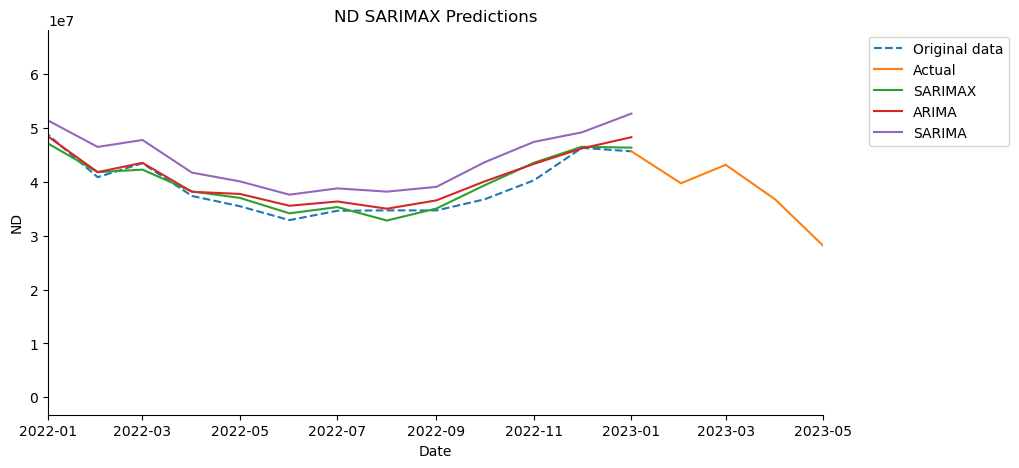

In [396]:
#Plot prediction and new data limited from January 2022
plt.figure(figsize=(10,5))
plt.plot(df_monthly['nd'], label='Original data',linestyle='--')
plt.plot(validation_monthly['ND'], label='Actual')
plt.plot(df_monthly['SARIMAX_predict'], label='SARIMAX')
plt.plot(df_monthly['ARIMA_predict'], label='ARIMA')
plt.plot(df_monthly['SARIMA_predict2'], label='SARIMA')

plt.xlim(pd.to_datetime('2022-01-01'), validation_monthly.index.max())

plt.title('ND SARIMAX Predictions')
plt.xlabel('Date')
plt.ylabel('ND')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.show()

Now that we have the validation data we are going to update the temperature exogenous variable for the SARIMAX model

In [397]:
#Determine exogenous variables
temp = pd.read_csv('../data/val_temperature_data.csv', index_col=0)
temp

,temperature
date,
2009-01-01,5.7
2009-02-01,6.4
2009-03-01,9.9
2009-04-01,13.3
2009-05-01,15.3
...,...
2023-01-01,7.3
2023-02-01,9.0
2023-03-01,8.9


In [398]:
#Set index to datetime
temp = temp.set_index(pd.to_datetime(temp.index))
temp.asfreq('MS')
validation_monthly['temp'] = temp

In [399]:
exog_variables = validation_monthly[['import_export', 'temp']]  

In [400]:
validation_exog = pd.concat([validation_exog, exog_variables], axis=0)

validation_exog

,import_export,temp
2020-03-01,4697670,9.3
2020-04-01,3485297,14.2
2020-05-01,3704969,16.7
2020-06-01,1980425,18.3
2020-07-01,569521,18.3
2020-08-01,2781127,19.9
2020-09-01,1667037,17.1
2020-10-01,3734544,12.4
2020-11-01,3841295,10.7
2020-12-01,3251016,6.8


In [401]:
validation_exog = validation_exog.set_index(pd.to_datetime(validation_exog.index))
#January first value row is duplicated
validation_exog.drop_duplicates(keep='first', inplace=True)

In [402]:
validation_exog.tail(10)

,import_export,temp
2022-08-01,-1134582,21.7
2022-09-01,-2189176,17.4
2022-10-01,-2006241,14.9
2022-11-01,-1952016,10.9
2022-12-01,1647075,5.9
2023-01-01,2171162,7.3
2023-02-01,2859913,9.0
2023-03-01,3409343,8.9
2023-04-01,2581531,11.9
2023-05-01,2850247,16.2


In [403]:
#Check boundaries
print(validation_monthly.index.min())
print(validation_monthly.index.max())

2023-01-01 00:00:00
2023-05-01 00:00:00


In [404]:
#Make predictions for the validation set
arima_validation = arima_model_fit.predict(start=validation_monthly.index[0], end=validation_monthly.index[-1])
sarima_validation = sarima_model_fit.predict(start=validation_monthly.index[0], end=validation_monthly.index[-1])
sarimax_validation = sarimax_model_fit.predict(start=validation_monthly.index[0], end=validation_monthly.index[-1], exog=validation_exog, disp=-1)

Since the ARIMA model predicts using the differenced data we need to reconctruct the forecast. This implies gathering the values from January to May 2022 from the original DataFrame, the next codeblock does some data wrangling to perform the reconstruction. 

In [405]:
#Select original df months to reconstruct
reconstruct_dates = ['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01']
#Include data from original df
reconstruct_values = df_monthly.loc[reconstruct_dates, 'nd']
#Make index datetime
reconstruct_values.index = pd.to_datetime(reconstruct_values.index).strftime("2023-%m-%d")
#Homogenize index 
reconstruct_values = reconstruct_values.to_frame().set_index(pd.to_datetime(reconstruct_values.index))
#Set index frequency
reconstruct_values = reconstruct_values.asfreq('MS')
#Check index
reconstruct_values.index

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01'],
              dtype='datetime64[ns]', name='settlement_date', freq='MS')

In [406]:
#Check reconstructed values
reconstruct_values

,nd
settlement_date,
2023-01-01,48750749
2023-02-01,40887505
2023-03-01,43485339
2023-04-01,37399615
2023-05-01,35482844


In [407]:
#Recontruct sarima validation by adding reconstruct values to the ARIMA prediction
arima_validation = arima_validation + reconstruct_values.iloc[:, 0]

#Check df
arima_validation

2023-01-01    4.831321e+07
2023-02-01    3.985419e+07
2023-03-01    4.179291e+07
2023-04-01    3.660460e+07
2023-05-01    3.489634e+07
Freq: MS, dtype: float64

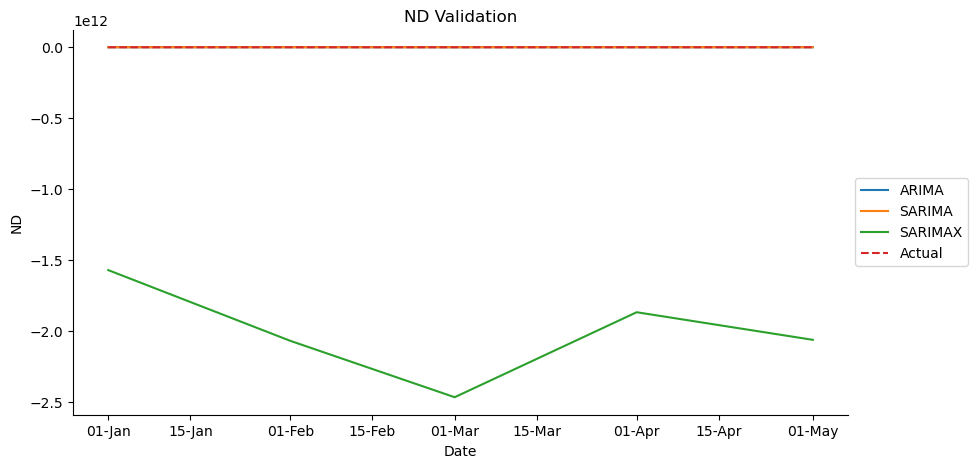

In [408]:
#Plot validation predictions
plt.figure(figsize=(10, 5))
plt.plot(arima_validation, label='ARIMA')
plt.plot(sarima_validation, label='SARIMA')
plt.plot(sarimax_validation, label='SARIMAX')
plt.plot(validation_monthly['ND'], label='Actual', linestyle='--')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('ND Validation')
plt.xlabel('Date')
plt.ylabel('ND')
sns.despine()

date_formatter = mdates.DateFormatter('%d-%b')
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.show()

Something if off with the SARIMAX predictions, probably it is related to the pickle file. Tried a bunch of solutions and opted to rerun the SARIMAX model in the current folder. 

## **Sarimax reconstruction**

In [409]:
#Set parameters
p, d, q = 3, 1, 2
P, D, Q, s = 0, 1, 3, 12

In [410]:
#Create train for fitting
train_2 = df_monthly.loc[df_monthly.index <= "2020-02-28", 'nd']
train_2.index = pd.to_datetime(train_2.index)
train_2 = train_2.asfreq('MS')
train_2 = train_2.reindex(pd.date_range(start=train_2.index.min(), end=train_2.index.max(), freq='MS', normalize=True))

In [411]:
#Make sure all indexes match 
df_monthly = df_monthly.asfreq('MS')
validation.index = pd.to_datetime(validation.index)
validation = validation.asfreq('MS')
exog_variables = exog_variables.asfreq('MS')
validation_exog.index = pd.to_datetime(validation_exog.index)
validation_exog = validation_exog.asfreq('MS')

In [412]:
#Fit model
exog_variables_fit = df_monthly.loc[train_2.index, ['import_export',  'temp']] 

order = (p, d, q)
seasonal_order = (P, D, Q, s) 

model = SARIMAX(endog=train_2, exog=exog_variables_fit, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

print(model_fit.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                         nd   No. Observations:                  134
Model:             SARIMAX(3, 1, 2)x(0, 1, [1, 2, 3], 12)   Log Likelihood               -1923.246
Date:                                    Sun, 25 Jun 2023   AIC                           3868.492
Time:                                            13:51:07   BIC                           3899.246
Sample:                                        01-01-2009   HQIC                          3880.982
                                             - 02-01-2020                                         
Covariance Type:                                      opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
import_export    -0.2812      0.181     -1.5

In [413]:
# Make predictions
validation_sarimax_predictions = model_fit.predict(start=validation_monthly.index[0], end=validation_monthly.index[-1], exog=validation_exog, disp=-1)

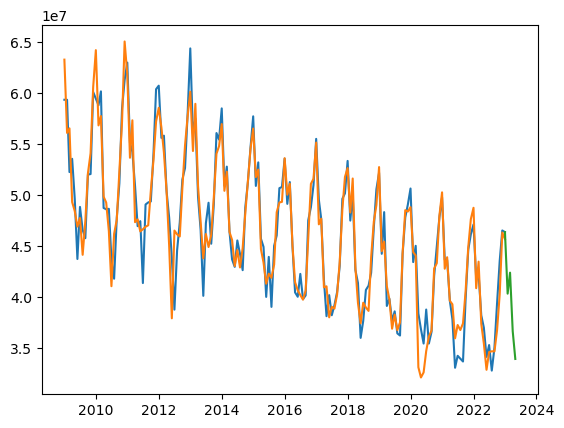

In [414]:
#Check predictions
plt.plot(df_monthly['SARIMAX_predict'])
plt.plot(df_monthly['nd'])
plt.plot(validation_sarimax_predictions)

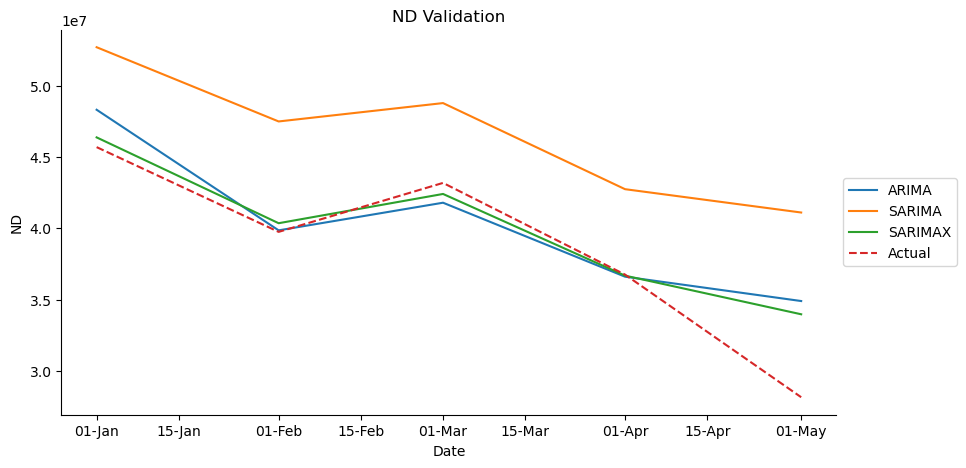

In [415]:
plt.figure(figsize=(10, 5))
plt.plot(arima_validation, label='ARIMA')
plt.plot(sarima_validation, label='SARIMA')
plt.plot(validation_sarimax_predictions, label='SARIMAX')
plt.plot(validation_monthly['ND'], label='Actual', linestyle='--')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('ND Validation')
plt.xlabel('Date')
plt.ylabel('ND')
sns.despine()

# Format x-axis labels to display only day and month
date_formatter = mdates.DateFormatter('%d-%b')
plt.gca().xaxis.set_major_formatter(date_formatter)

plt.show()


In [416]:
#Save results
results['Validation_MAPE'] = 0
results['Validation_MAE'] = 0

results

,model,Train_MAPE,Test_MAPE,Train_MAE,Test_MAE,Validation_MAPE,Validation_MAE
0,Simple_Mean,3.957661,5.488195,1.867551e+06,2.126467e+06,0,0
1,Rolling_AVG,5.310872,5.135859,2.520438e+06,2.122838e+06,0,0
2,"ARIMA(4,0,2)",12.243213,5.152527,6.198869e+06,1.990700e+06,0,0
3,"SARIMA(3,1,2)x(0,1,3,12)",4.567475,7.047027,2.184182e+06,2.740520e+06,0,0
4,"SARIMAX(3,1,2)x(0,1,3,12)",3.431899,3.730760,1.608049e+06,1.417350e+06,0,0


In [417]:
ARIMA_validation_mape = mean_absolute_percentage_error(validation_monthly['ND'], arima_validation)
ARIMA_validation_mae = mean_absolute_error(validation_monthly['ND'], arima_validation)
SARIMA_validation_mape = mean_absolute_percentage_error(validation_monthly['ND'], sarima_validation)
SARIMA_validation_mae = mean_absolute_error(validation_monthly['ND'], sarima_validation)
SARIMAX_validation_mape = mean_absolute_percentage_error(validation_monthly['ND'], validation_sarimax_predictions)
SARIMAX_validation_mae = mean_absolute_error(validation_monthly['ND'], validation_sarimax_predictions)

#Print results
print(f"ARIMA Validation MAPE: {round(ARIMA_validation_mape,2)}")
print(f"ARIMA Validation MAE: {round(ARIMA_validation_mae)}")
print(f"SARIMA Validation MAPE: {round(SARIMA_validation_mape,2)}")
print(f"SARIMA Validation MAE: {round(SARIMA_validation_mae)}")
print(f"SARIMAX Validation MAPE: {round(SARIMAX_validation_mape,2)}")
print(f"SARIMAX Validation MAE: {round(SARIMAX_validation_mae)}")

ARIMA Validation MAPE: 6.72
ARIMA Validation MAE: 2202055
SARIMA Validation MAPE: 22.02
SARIMA Validation MAE: 7859852
SARIMAX Validation MAPE: 5.14
SARIMAX Validation MAE: 1591380


In [418]:
results.loc[results['model'] == 'ARIMA(4,0,2)', 'Validation_MAE'] = ARIMA_validation_mae
results.loc[results['model'] == 'ARIMA(4,0,2)', 'Validation_MAPE'] = ARIMA_validation_mape
results.loc[results['model'] == 'SARIMA(3,1,2)x(0,1,3,12)', 'Validation_MAE'] = SARIMA_validation_mae
results.loc[results['model'] == 'SARIMA(3,1,2)x(0,1,3,12)', 'Validation_MAPE'] = SARIMA_validation_mape
results.loc[results['model'] == 'SARIMAX(3,1,2)x(0,1,3,12)', 'Validation_MAE'] = SARIMAX_validation_mae
results.loc[results['model'] == 'SARIMAX(3,1,2)x(0,1,3,12)', 'Validation_MAPE'] = SARIMAX_validation_mape

results

,model,Train_MAPE,Test_MAPE,Train_MAE,Test_MAE,Validation_MAPE,Validation_MAE
0,Simple_Mean,3.957661,5.488195,1.867551e+06,2.126467e+06,0.000000,0.000000e+00
1,Rolling_AVG,5.310872,5.135859,2.520438e+06,2.122838e+06,0.000000,0.000000e+00
2,"ARIMA(4,0,2)",12.243213,5.152527,6.198869e+06,1.990700e+06,6.717612,2.202055e+06
3,"SARIMA(3,1,2)x(0,1,3,12)",4.567475,7.047027,2.184182e+06,2.740520e+06,22.023466,7.859852e+06
4,"SARIMAX(3,1,2)x(0,1,3,12)",3.431899,3.730760,1.608049e+06,1.417350e+06,5.137201,1.591380e+06


As we can observe from the table above, the performance of the models is not satisfactory. Specifically, we notice that the MAPE value for SARIMAX decreases nearly to the level of the Rolling Average baseline model.

### **5. Results Plots**

In [419]:
full_arima = pd.concat([df_monthly['ARIMA_predict'].reset_index(drop=True),
                         arima_validation.reset_index(drop=True)], axis=0)
full_arima.index = df_monthly.index.append(validation_monthly.index[:5])

full_sarima = pd.concat([df_monthly['SARIMA_predict'].reset_index(drop=True),
                         sarima_validation.reset_index(drop=True)], axis=0)
full_sarima.index = df_monthly.index.append(validation_monthly.index[:5])
full_sarima.drop(full_sarima.index[-5], inplace=True)

full_sarimax = pd.concat([df_monthly['SARIMAX_predict'].reset_index(drop=True),
                         validation_sarimax_predictions.reset_index(drop=True)], axis=0)
full_sarimax.index = df_monthly.index.append(validation_monthly.index[:5])

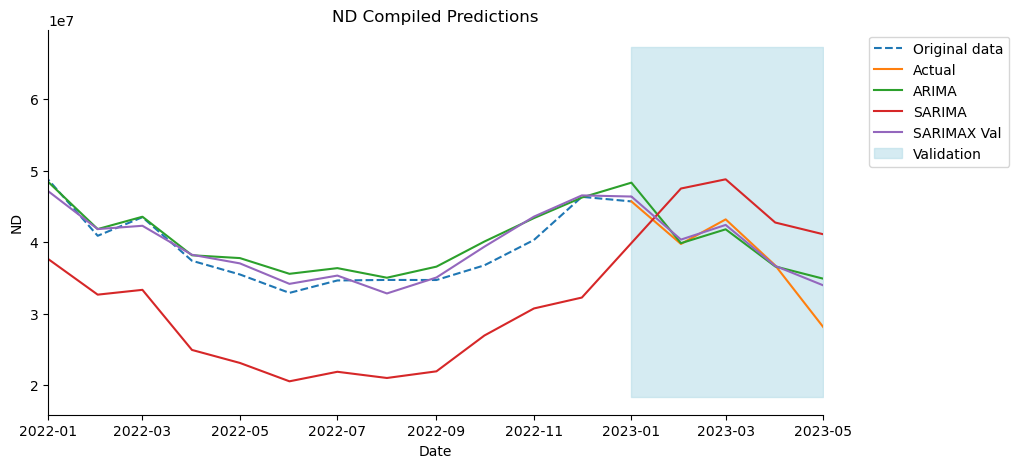

In [420]:
plt.figure(figsize=(10,5))
plt.plot(df_monthly['nd'], label='Original data', linestyle='--')
plt.plot(validation_monthly['ND'], label='Actual')
plt.plot(full_arima.replace(0, np.nan), label='ARIMA')
plt.plot(full_sarima, label='SARIMA')
plt.plot(full_sarimax, label='SARIMAX Val')

plt.fill_between(validation_monthly.index, plt.ylim()[0], plt.ylim()[1],
                 where=(validation_monthly.index >= validation_monthly.index.min()) &
                       (validation_monthly.index <= validation_monthly.index.max()),
                 color='lightblue', alpha=0.5, label='Validation')

plt.xlim(pd.to_datetime('2022-01-01'), validation_monthly.index.max())

plt.title('ND Compiled Predictions')
plt.xlabel('Date')
plt.ylabel('ND')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.show()


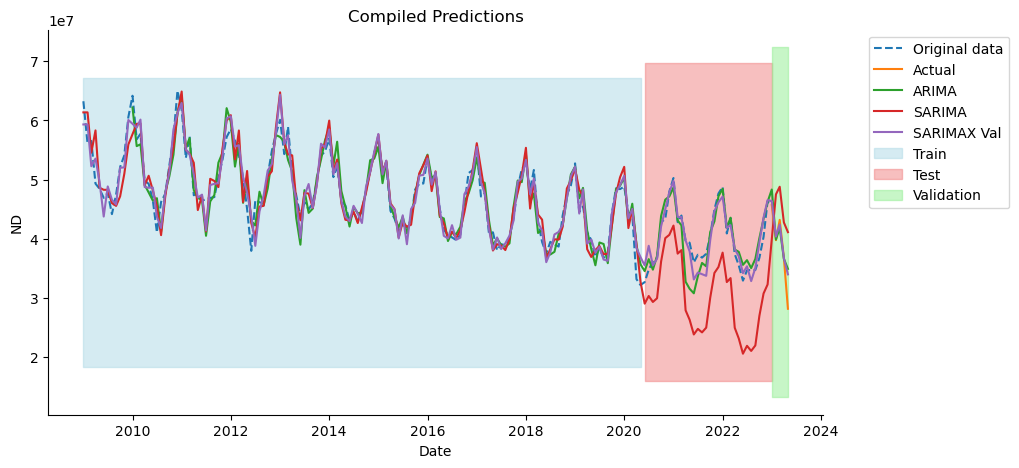

In [421]:
plt.figure(figsize=(10, 5))
plt.plot(df_monthly['nd'], label='Original data', linestyle='--')
plt.plot(validation_monthly['ND'], label='Actual')
plt.plot(full_arima.replace(0, np.nan), label='ARIMA')
plt.plot(full_sarima, label='SARIMA')
plt.plot(full_sarimax, label='SARIMAX Val')

plt.fill_between(df_monthly.index, plt.ylim()[0], plt.ylim()[1],
                 where=(df_monthly.index >= '2009-01-01') &
                       (df_monthly.index <= '2020-05-01'),
                 color='lightblue', alpha=0.5, label='Train')

plt.fill_between(df_monthly.index, plt.ylim()[0], plt.ylim()[1],
                 where=(df_monthly.index >= '2020-06-01') &
                       (df_monthly.index <= '2023-01-01'),
                 color='lightcoral', alpha=0.5, label='Test')

plt.fill_between(validation_monthly.index, plt.ylim()[0], plt.ylim()[1],
                 where=(validation_monthly.index >= validation_monthly.index.min()) &
                       (validation_monthly.index <= validation_monthly.index.max()),
                 color='lightgreen', alpha=0.5, label='Validation')

plt.title('Compiled Predictions')
plt.xlabel('Date')
plt.ylabel('ND')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.show()

In [422]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_monthly.index, y=df_monthly['nd'], name='Original data', mode='lines', line=dict(dash='dash')))
fig.add_trace(go.Scatter(x=validation_monthly.index, y=validation_monthly['ND'], name='Validation', mode='lines'))
fig.add_trace(go.Scatter(x=full_arima.index, y=full_arima.replace(0, float('nan')), name='ARIMA', mode='lines'))
fig.add_trace(go.Scatter(x=full_sarima.index, y=full_sarima, name='SARIMA', mode='lines'))
fig.add_trace(go.Scatter(x=full_sarimax.index, y=full_sarimax, name='SARIMAX Val', mode='lines'))

fig.update_layout(
    title={'text': '<b>Compiled Predictions</b>', 'x': 0.5,'xanchor': 'center', 'y': 0.95,'yanchor': 'top'},
    xaxis_title='Date',
    yaxis_title='ND',
    legend=dict(x=1.05, y=1),
    showlegend=True,
    xaxis_rangeslider_visible=True)
fig.show()


In [423]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_monthly.index, y=df_monthly['nd'], name='Original data', line=dict(dash='dash')))
fig.add_trace(go.Scatter(x=validation_monthly.index, y=validation_monthly['ND'], name='Validation', mode='lines'))
fig.add_trace(go.Scatter(x=full_arima.index, y=full_arima.replace(0, None), name='ARIMA'))
fig.add_trace(go.Scatter(x=full_sarima.index, y=full_sarima, name='SARIMA'))
fig.add_trace(go.Scatter(x=full_sarimax.index, y=full_sarimax, name='SARIMAX Val'))

# Add shaded regions
fig.add_shape(type='rect', x0='2009-01-01', x1='2020-05-01', y0=fig.data[0].y.min(),
              y1=fig.data[0].y.max(), fillcolor='lightblue', opacity=0.5, layer='below', line_width=0, name='Train')
fig.add_shape(type='rect', x0='2020-06-01', x1='2023-01-01', y0=fig.data[0].y.min(),
              y1=fig.data[0].y.max(), fillcolor='lightcoral', opacity=0.5, layer='below', line_width=0, name='Test')
fig.add_shape(type='rect', x0=validation_monthly.index.min(), x1=validation_monthly.index.max(), y0=fig.data[0].y.min(), y1=fig.data[0].y.max(),
              fillcolor='lightgreen', opacity=0.5, layer='below', line_width=0, name='Validation')

fig.add_annotation(x='2015-06-01', y=fig.data[0].y.max(), text='Train', showarrow=False, font=dict(color='black'))
fig.add_annotation(x='2021-01-01', y=fig.data[0].y.max(), text='Test', showarrow=False, font=dict(color='black'))
fig.add_annotation(x=validation_monthly.index.min(), y=fig.data[0].y.max(), text='Validation', showarrow=False, font=dict(color='black'))

fig.update_layout(
    title={
        'text': '<b>Compiled Predictions</b>',
        'x': 0.5,
        'xanchor': 'center',
        'y': 0.95,
        'yanchor': 'top'},
    xaxis_title='Date',
    yaxis_title='ND',
    legend=dict(x=1.05, y=1),
    showlegend=True,
    xaxis_rangeslider_visible=True)

fig.show()

In [424]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=validation_monthly.index, y=arima_validation, name='ARIMA'))
fig.add_trace(go.Scatter(x=validation_monthly.index, y=sarima_validation, name='SARIMA'))
fig.add_trace(go.Scatter(x=validation_monthly.index, y=validation_sarimax_predictions, name='SARIMAX'))
fig.add_trace(go.Scatter(x=validation_monthly.index, y=validation_monthly['ND'], name='ND', mode='lines', line=dict(dash='dash')))

fig.update_layout(
    title={
        'text': '<b>ND Validation</b>',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    xaxis_title='Date',
    yaxis_title='ND',
    legend=dict(x=1, y=0.5),
    xaxis=dict(
        tickformat='%d-%b'
    )
)

fig.show()